In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd 
import numpy as nm  
import matplotlib.pyplot as mtp  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
from sklearn.svm import SVC

**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df1=df.drop(['User ID','Gender'],axis=1)
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
x=df1[['Age','EstimatedSalary']].values
y=df1['Purchased'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [6]:
scaling=StandardScaler()
scaling.fit_transform(x_train,x_test)

array([[ 2.14062944,  0.41639261],
       [-0.05035174,  0.32833375],
       [ 1.66432918,  1.64921666],
       [-0.3361319 , -0.75772553],
       [-0.9076922 , -1.08060801],
       [-1.09821231, -1.55025527],
       [-0.05035174,  0.18156898],
       [ 0.71172867, -1.37413755],
       [-1.38399246, -0.61096076],
       [ 0.14016836, -0.28807827],
       [-0.24087184, -1.28607869],
       [-0.24087184, -0.25872532],
       [-1.57451256, -1.55025527],
       [ 1.66432918, -0.87513734],
       [-1.09821231, -1.57960822],
       [-0.62191205,  0.59251033],
       [ 0.42594852,  0.62186329],
       [-1.76503267,  0.47509852],
       [ 0.33068846, -0.5229019 ],
       [ 0.33068846, -1.13931392],
       [-0.9076922 , -0.28807827],
       [ 0.33068846,  0.09351012],
       [ 1.95010934, -0.90449029],
       [ 1.85484929, -0.25872532],
       [ 0.90224877, -1.43284346],
       [ 0.23542841, -0.28807827],
       [-0.81243215,  0.41639261],
       [-1.00295225, -1.52090232],
       [-0.14561179,

**Fitting SVM to the Training set**

In [7]:
classifier = SVC(C= .1, kernel='linear', gamma= 1)
classifier.fit(x_train, y_train)
 

SVC(C=0.1, gamma=1, kernel='linear')

**Predicting the Test set results**

In [8]:
y_pred= classifier.predict(x_test)  

**Making the Confusion Matrix**

In [9]:
cm= confusion_matrix(y_test, y_pred)  

**Visualising the Training set results**

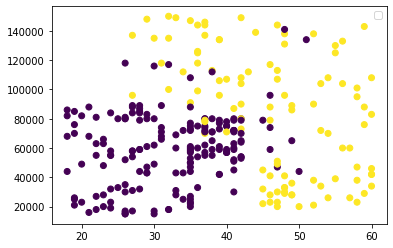

In [10]:
mtp.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
mtp.legend()
mtp.show()


**Visualising the Test set results**

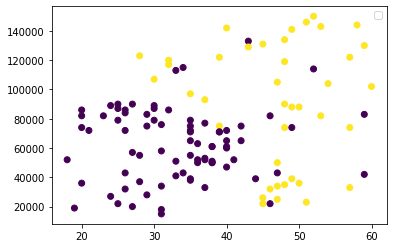

In [11]:
mtp.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
mtp.legend()
mtp.show()



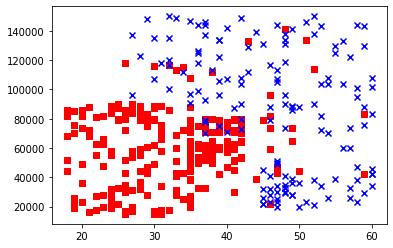

In [12]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(nm.unique(y_test))])
for idx, cl in enumerate(nm.unique(y)):
    mtp.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)